In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2527, 0.6705, 0.7664],
        [0.5732, 0.8216, 0.3358],
        [0.1723, 0.1019, 0.6225],
        [0.0657, 0.3229, 0.3358],
        [0.0245, 0.7891, 0.4086]])


d:\anaconda3\envs\DSLab\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.cuda.is_available()

True

# Loading the Data

In [4]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_meta = pd.read_csv('./Dataset/csv/meta.csv')
df_meta.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [6]:
# load dicom info file
df_dicom = pd.read_csv('./Dataset/csv/dicom_info.csv')
df_dicom.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [7]:
df_dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [8]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [9]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
cropped_images.head(5)

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [10]:
cropped_images.info()

<class 'pandas.core.series.Series'>
Index: 3567 entries, 0 to 10236
Series name: image_path
Non-Null Count  Dtype 
--------------  ----- 
3567 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


In [11]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
full_mammo.head(5)

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [12]:
full_mammo.info()

<class 'pandas.core.series.Series'>
Index: 2857 entries, 1 to 10234
Series name: image_path
Non-Null Count  Dtype 
--------------  ----- 
2857 non-null   object
dtypes: object(1)
memory usage: 44.6+ KB


In [13]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
roi_img.head(5)

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
roi_img.info()

<class 'pandas.core.series.Series'>
Index: 3247 entries, 5 to 10235
Series name: image_path
Non-Null Count  Dtype 
--------------  ----- 
3247 non-null   object
dtypes: object(1)
memory usage: 50.7+ KB


In [15]:
# set correct image path for image types
imdir = './Dataset/jpeg'

In [16]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [17]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[3]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[3]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[3]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [18]:
full_mammo_dict.values()

dict_values(['./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488/1-128.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885412946410823689524902893984551/1-007.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.362722981912364196037055929741492450134/1-074.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.106891403212241567917640106401990119369/1-007.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.121186059612438420227614821281510350601/1-086.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.146562048712352276901801184130547373645/1-032.jpg', './Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245002691212776218

In [19]:
full_mammo_dict.keys()

dict_keys(['1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849', '1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771', '1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488', '1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062', '1.3.6.1.4.1.9590.100.1.2.98765885412946410823689524902893984551', '1.3.6.1.4.1.9590.100.1.2.362722981912364196037055929741492450134', '1.3.6.1.4.1.9590.100.1.2.106891403212241567917640106401990119369', '1.3.6.1.4.1.9590.100.1.2.121186059612438420227614821281510350601', '1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162', '1.3.6.1.4.1.9590.100.1.2.146562048712352276901801184130547373645', '1.3.6.1.4.1.9590.100.1.2.245002691212776218107391387354275491674', '1.3.6.1.4.1.9590.100.1.2.310678740812777884533280065583566937530', '1.3.6.1.4.1.9590.100.1.2.37443696213477719541152546684205642873', '1.3.6.1.4.1.9590.100.1.2.142907773911947688702213113893866359104', '1.3.6.1.4.1.9590.100.1.2.19253019771148

# Mass Dataset

In [20]:
# load the mass dataset
mass_train = pd.read_csv('./Dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('./Dataset/csv/mass_case_description_test_set.csv')

mass_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [21]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [22]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [23]:
# check unique values in pathology column
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [24]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [25]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386...   
1  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.359308...   
2  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.891800...   
3  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295360...   
4  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.410524...   

                             cropped_image_file_path  \
0  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.296736...   
1  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.227955...   
2  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.429120...   
3  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.115134...   
4  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.128573...   

                                  ROI_mask_file_path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [26]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [27]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [28]:
# quantitative summary of features
mass_train.describe()

breast_density  abnormality_id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [29]:
# view mass_test
mass_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063...   
1  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.859522...   
2  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.221311...   
3  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...   
4  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.215081...   

                             cropped image file path  \
0  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.308205...   
1  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.381440...   
2  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.212143...   
3  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.154030...   
4  ./Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.199593...   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [30]:
mass_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [31]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [32]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [33]:
# check for column names in mass_test
print(mass_test.columns)
print('\n')
# rename columns
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
mass_test.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')




Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [34]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].fillna(method='bfill')

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

# Visualizations

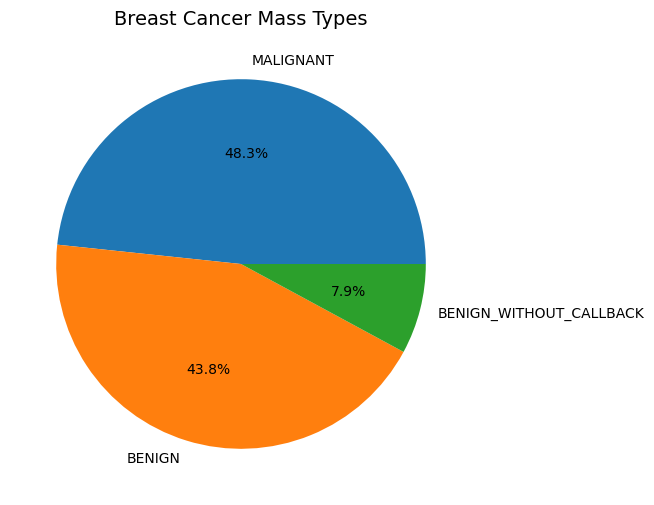

In [35]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('./working/pathology_distributions_red.png')
plt.show()

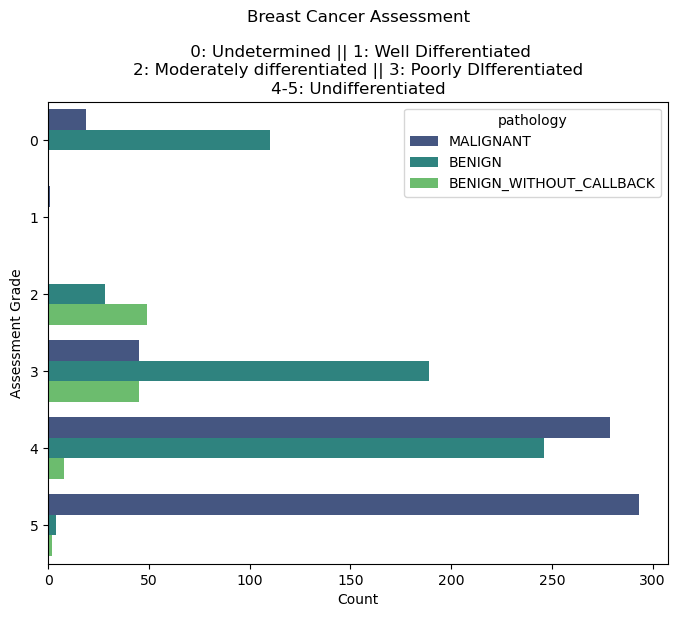

In [36]:
# examine breast assessment types
plt.figure(figsize=(8,6))
sns.countplot(mass_train, y='assessment', hue='pathology', palette='viridis')
plt.title('Breast Cancer Assessment\n\n 0: Undetermined || 1: Well Differentiated\n2: Moderately differentiated || 3: Poorly DIfferentiated\n4-5: Undifferentiated', 
          fontsize=12)
plt.ylabel('Assessment Grade')
plt.xlabel('Count')
plt.savefig('./working/breast_assessment_red.png')
plt.show()

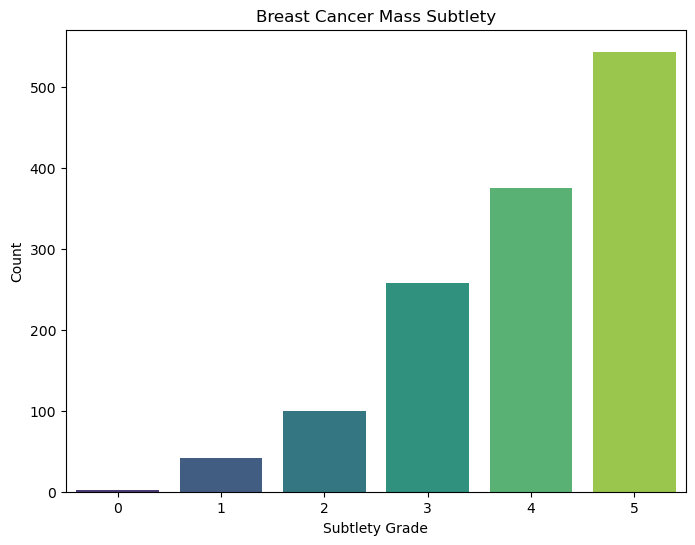

In [37]:
# examine cancer subtlety
plt.figure(figsize=(8,6))
sns.countplot(mass_train, x='subtlety', palette='viridis')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.savefig('./working/cancer_subtlety_red.png')
plt.show()

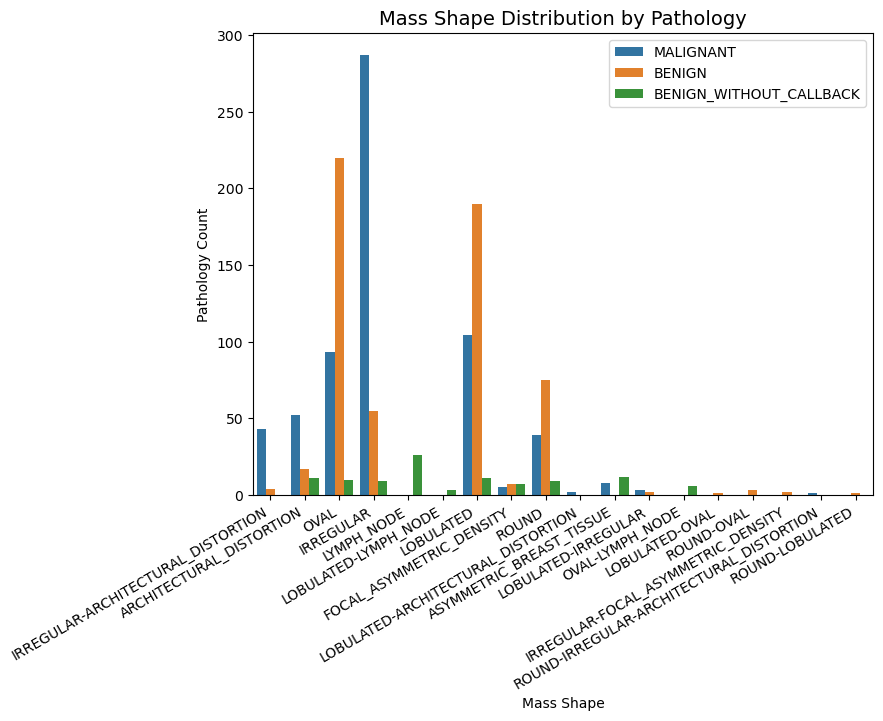

In [38]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
plt.savefig('./working/mass_pathology_red.png')
plt.show()

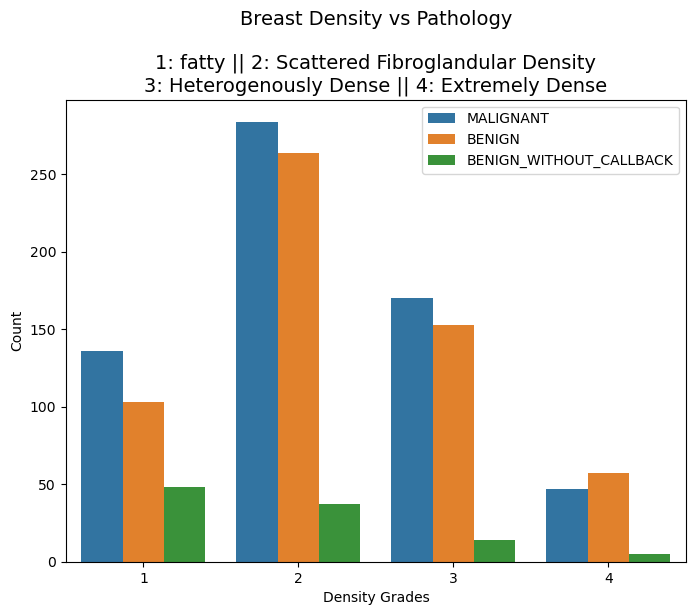

In [39]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('./working/density_pathology_red.png')
plt.show()

Full Mammograms:



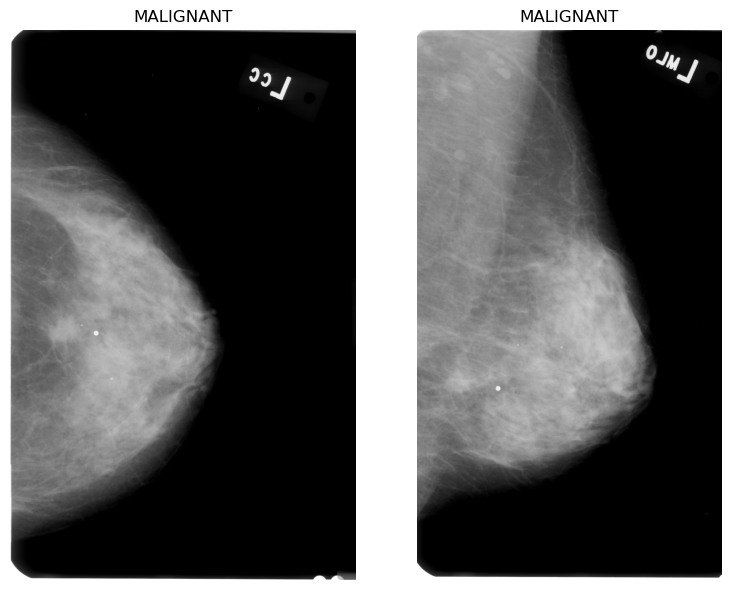

Cropped Mammograms:



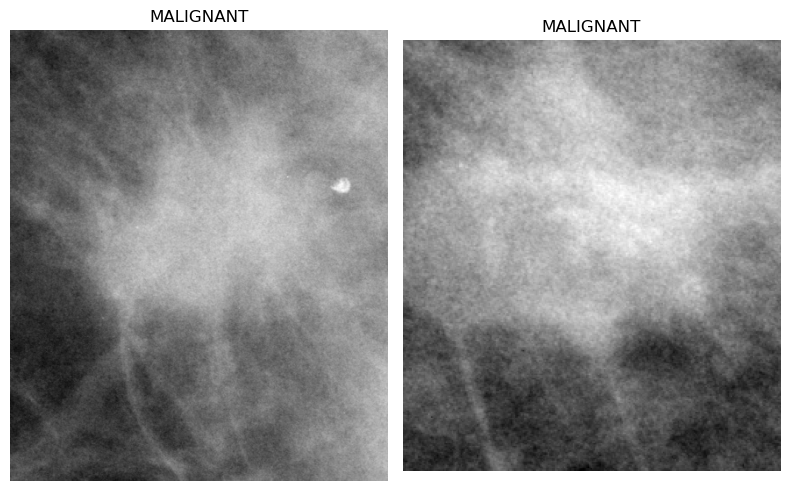

In [40]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 2)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 2)

# Preprocessing of Images

In [41]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [42]:
if tf.test.is_gpu_available():
    # Get the list of available GPUs
    gpu_list = tf.config.list_physical_devices('GPU')
    print("GPU(s) available: ", len(gpu_list))
    # Ensure TensorFlow is using GPU acceleration
    print("TensorFlow is using GPU acceleration.")
else:
    print("No GPU available. TensorFlow is using CPU.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU(s) available:  1
TensorFlow is using GPU acceleration.


In [43]:
import sklearn
print(sklearn.__version__)

1.3.2


In [44]:
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [45]:
# Define custom functions for advanced augmentation/transformation techniques
def apply_gaussian_blur(image):
    # Apply Gaussian Blur
    blurred_image  = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image 

# def apply_histogram_equalization(image):
def apply_histogram_equalization(image_array):
    equalized_images = []
    for img in image_array:
        lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab_image)
        
        # Ensure the channel is in uint8 format and single-channel (8-bit)
        l = np.uint8(l)
        a = np.uint8(a)
        b = np.uint8(b)
        
        # Perform histogram equalization on the single channel
        l_eq = cv2.equalizeHist(l)
        
        # Merge the equalized channel with the original A and B channels
        equalized_lab_image = cv2.merge((l_eq, a, b))
        
        # Convert the equalized LAB image back to RGB color space
        equalized_image = cv2.cvtColor(equalized_lab_image, cv2.COLOR_LAB2RGB)
        
        equalized_images.append(equalized_image)
        
    return np.array(equalized_images)

# Apply Perspective Transformation
def apply_perspective_transform(image):
    rows, cols, _ = image.shape
    random_margin = 60
    left_top = np.random.randint(-random_margin, random_margin)
    right_top = np.random.randint(-random_margin, random_margin)
    left_bottom = np.random.randint(-random_margin, random_margin)
    right_bottom = np.random.randint(-random_margin, random_margin)

    pts1 = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
    pts2 = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
    pts2[0] += [left_top, right_top]
    pts2[1] += [right_top, left_top]
    pts2[2] += [left_bottom, right_bottom]
    pts2[3] += [right_bottom, left_bottom]
    M = cv2.getPerspectiveTransform(pts1, pts2)
    transformed_image = cv2.warpPerspective(image, M, (cols, rows))
    return transformed_image

# Composite function combining all preprocessing functions
def combined_preprocessing(image):
    # Choose the desired preprocessing function:
    # image = apply_gaussian_blur(image)
    # image = apply_histogram_equalization(image)
    # image = apply_perspective_transform(image)
    return image


def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    #Denoising
    #image = cv2.fastNlMeansDenoisingColored(image, h = 5, hColor = 15)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))

    ####
    ##In this case, we do the preprocessing before feed them into the data augmentation stage during training
    # Apply Gaussian Blur
    # image = apply_gaussian_blur(image)
    # Apply Perspective Transformation
    # image = apply_perspective_transform(image)
    # Apply Histogram Equalization
    # image = apply_histogram_equalization(image)
    ####

    # Normalize image (mean normalization)
    image_array = image.astype('float32') / 255.0
    
    return image_array    


In [46]:
# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 0, 'BENIGN': 1, 'BENIGN_WITHOUT_CALLBACK': 1} 

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(full_mass['labels'].unique())

# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, full_mass['labels'].values, test_size=0.3, random_state=100)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=100)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [47]:
# Custom image data generator with advanced augmentation techniques
class AdvancedImageDataGenerator(ImageDataGenerator):
    def __init__(self, blur_range=None, perspective_transform=False, **kwargs):
        super().__init__(**kwargs)
        self.blur_range = blur_range
        self.perspective_transform = perspective_transform

    def apply_advanced_augmentation(self, image):
        if self.blur_range:
            sigma = np.random.uniform(*self.blur_range)
            image = cv2.GaussianBlur(image, (5, 5), sigma)

        if self.perspective_transform:
            image = apply_perspective_transform(image)
            
        return image
    
    def flow(self, x, y=None, **kwargs):
        batches = super().flow(x, y, **kwargs)
        while True:
            x_batch, y_batch = next(batches)
            augmented_x = np.zeros_like(x_batch)
            for i in range(len(x_batch)):
                augmented_x[i] = self.apply_advanced_augmentation(x_batch[i])
            yield augmented_x, y_batch



In [48]:
# Define parameters for advanced augmentation
blur_params = (0.1, 2.0)  # Range for Gaussian Blur
perspective_enabled = True

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=20,  # Random channel shifts   
    fill_mode='nearest',
    preprocessing_function = combined_preprocessing
)

# X_train = apply_histogram_equalization(X_train)

train_data_augmented = datagen.flow(X_train, y_train, batch_size=32)

# Advanced Image Data Generator
# train_datagen_advanced = AdvancedImageDataGenerator(
#     blur_range=blur_params,
#     perspective_transform=perspective_enabled,
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     brightness_range=[0.8, 1.2],  # Adjusting brightness
#     channel_shift_range=20,  # Random channel shifts
#     fill_mode='nearest'
# )

# train_data_augmented_advanced = train_datagen_advanced.flow(X_train, y_train, batch_size=32)


# CNN Architecture

In [49]:
# Import necessary TensorFlow libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [50]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)

In [51]:
# instantiate CNN model
model = Sequential()

# add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # flatten feature maps
model.add(Dense(512, activation='relu')) # add fully connected layers
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid')) # For binary classification output layer

# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

# train model
history = model.fit(train_data_augmented,
                    epochs=20,  # Increase epochs for better training
                    steps_per_epoch=len(X_train) // 32,  # Increase steps per epoch
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/20
37/37 [==============================] - 19s 370ms/step - loss: 0.9083 - accuracy: 0.5264 - val_loss: 0.6951 - val_accuracy: 0.4286
Epoch 2/20
37/37 [==============================] - 14s 374ms/step - loss: 0.9474 - accuracy: 0.5042 - val_loss: 0.7442 - val_accuracy: 0.4345
Epoch 3/20
37/37 [==============================] - 14s 363ms/step - loss: 0.9595 - accuracy: 0.5126 - val_loss: 0.7067 - val_accuracy: 0.4524
Epoch 4/20
37/37 [==============================] - 14s 369ms/step - loss: 0.9360 - accuracy: 0.5074 - val_loss: 0.6909 - val_accuracy: 0.5595
Epoch 5/20
37/37 [==============================] - 14s 373ms/step - loss: 0.9330 - accuracy: 0.5030 - val_loss: 0.8338 - val_accuracy: 0.4345
Epoch 6/20
37/37 [==============================] - 14s 365ms/step - loss: 1.0286 - accuracy: 0.5022 - val_loss: 0.7052 - val_accuracy: 0.5655
Epoch 7/20
37/37 [==============================] - 14s 365ms/step - loss: 1.0758 - accuracy: 0.4866 - val_loss: 0.7604 - val_accuracy: 0.4464

In [52]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

# Evaluation

In [53]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 45ms/step - loss: 0.6942 - accuracy: 0.5513


[0.6941655278205872, 0.5513196587562561]

# Classification Report

38/38 [==============================] - 1s 17ms/step
Train Set Classification report:
               precision    recall  f1-score   support

   MALIGNANT       0.50      0.02      0.03       561
      BENIGN       0.53      0.98      0.69       626

    accuracy                           0.53      1187
   macro avg       0.51      0.50      0.36      1187
weighted avg       0.51      0.53      0.38      1187




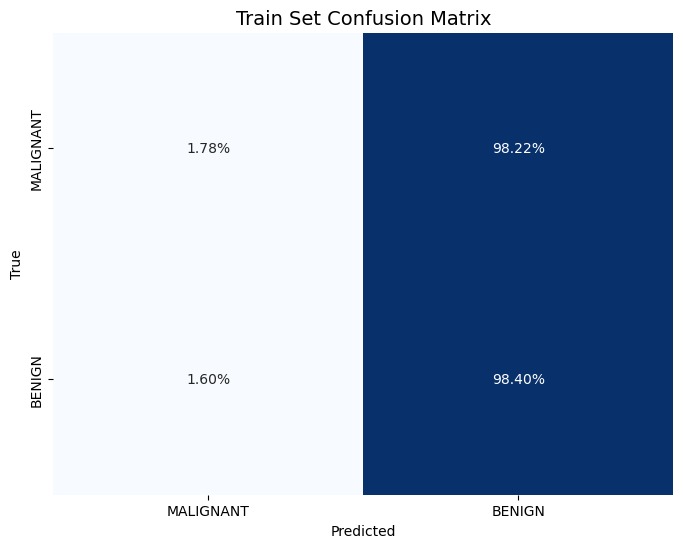

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# create labels for confusion matrix
cm_labels = ['MALIGNANT', 'BENIGN']

# obtain predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# convert predicted probabilities to class predictions
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Assuming y_test and y_val are in binary format (0 or 1)
y_true_classes_test = np.argmax(y_test, axis=1)
y_true_classes_train = np.argmax(y_train, axis=1)

# generate classification reports for test and val sets
test_report = classification_report(y_true_classes_test, y_pred_classes_test, target_names=cm_labels)
train_report = classification_report(y_true_classes_train, y_pred_classes_train, target_names=cm_labels)

# generate confusion matrices for test and validation sets
test_cm = confusion_matrix(y_true_classes_test, y_pred_classes_test)
train_cm = confusion_matrix(y_true_classes_train, y_pred_classes_train)

# create function to print confusion matrix
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# print Train and Test reports and matrices
print(f"Train Set Classification report:\n {train_report}\n")
plot_confusion_matrix(train_cm, cm_labels, 'Train Set Confusion Matrix')

Test Set Classification report:
               precision    recall  f1-score   support

   MALIGNANT       0.20      0.01      0.01       150
      BENIGN       0.56      0.98      0.71       191

    accuracy                           0.55       341
   macro avg       0.38      0.49      0.36       341
weighted avg       0.40      0.55      0.40       341




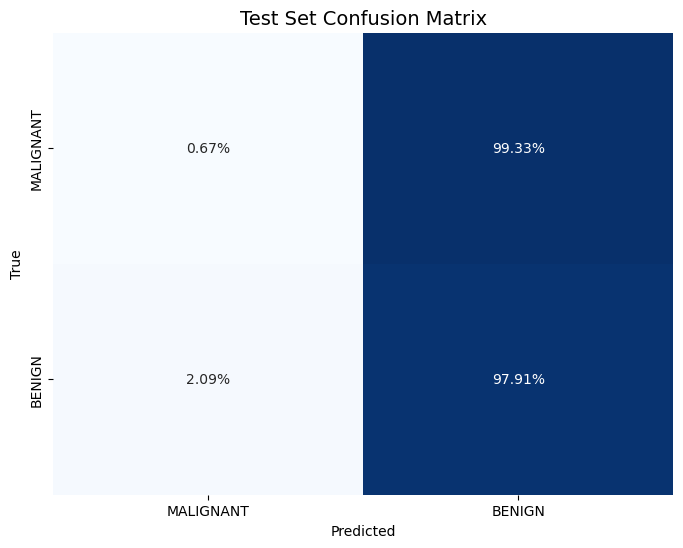

In [55]:
print(f"Test Set Classification report:\n {test_report}\n")
plot_confusion_matrix(test_cm, cm_labels, 'Test Set Confusion Matrix')

# ROC_AUC Curves

11/11 [==============================] - 0s 17ms/step


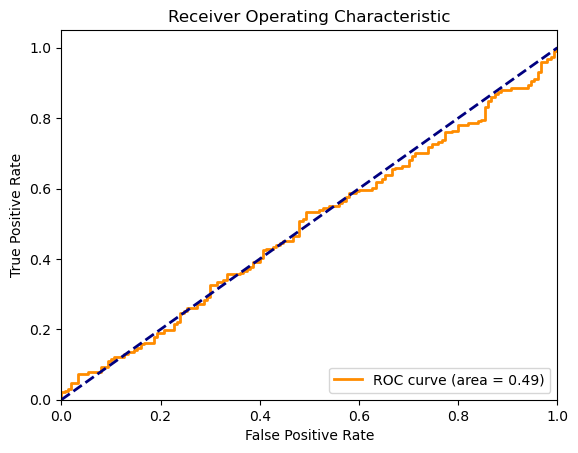

AUC: 0.49


In [56]:
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

# Visualizing Loss vs Epoch/Accuracy vs Epoch 

In [57]:
history_dict = history.history

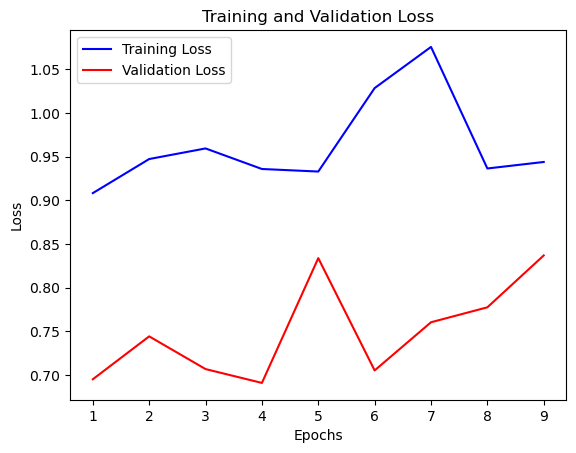

In [58]:
# plot training loss vs validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#history_df = pd.DataFrame(history.history)
#history_df[['loss', 'val_loss']].plot()

#history_df = pd.DataFrame(history.history)
#history_df[['accuracy', 'val_accuracy']].plot()

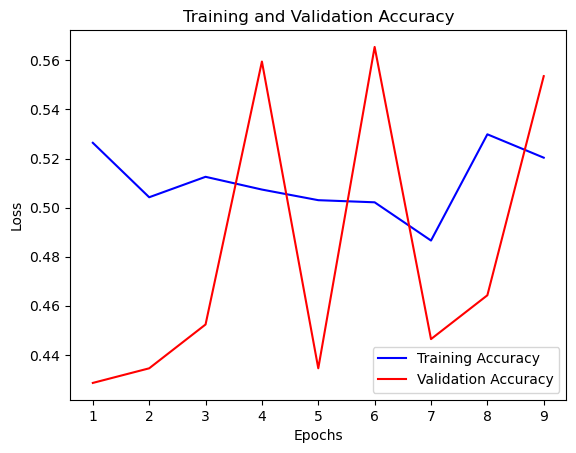

In [59]:
# plot training vs validation accuracy
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
import random

# reverse class mapping
reverse_mapper = {v:k for k, v in class_mapper.items()}
prediction = model.predict(X_test)
# map predictions to class_names
predicted_class_indices = np.argmax(prediction, axis=1)
predicted_class_names = [reverse_mapper[i] for i in predicted_class_indices]

ground_truth_class_indices = np.argmax(y_test, axis=1)
ground_truth_class_names = [reverse_mapper[i] for i in ground_truth_class_indices]

11/11 [==============================] - 0s 17ms/step


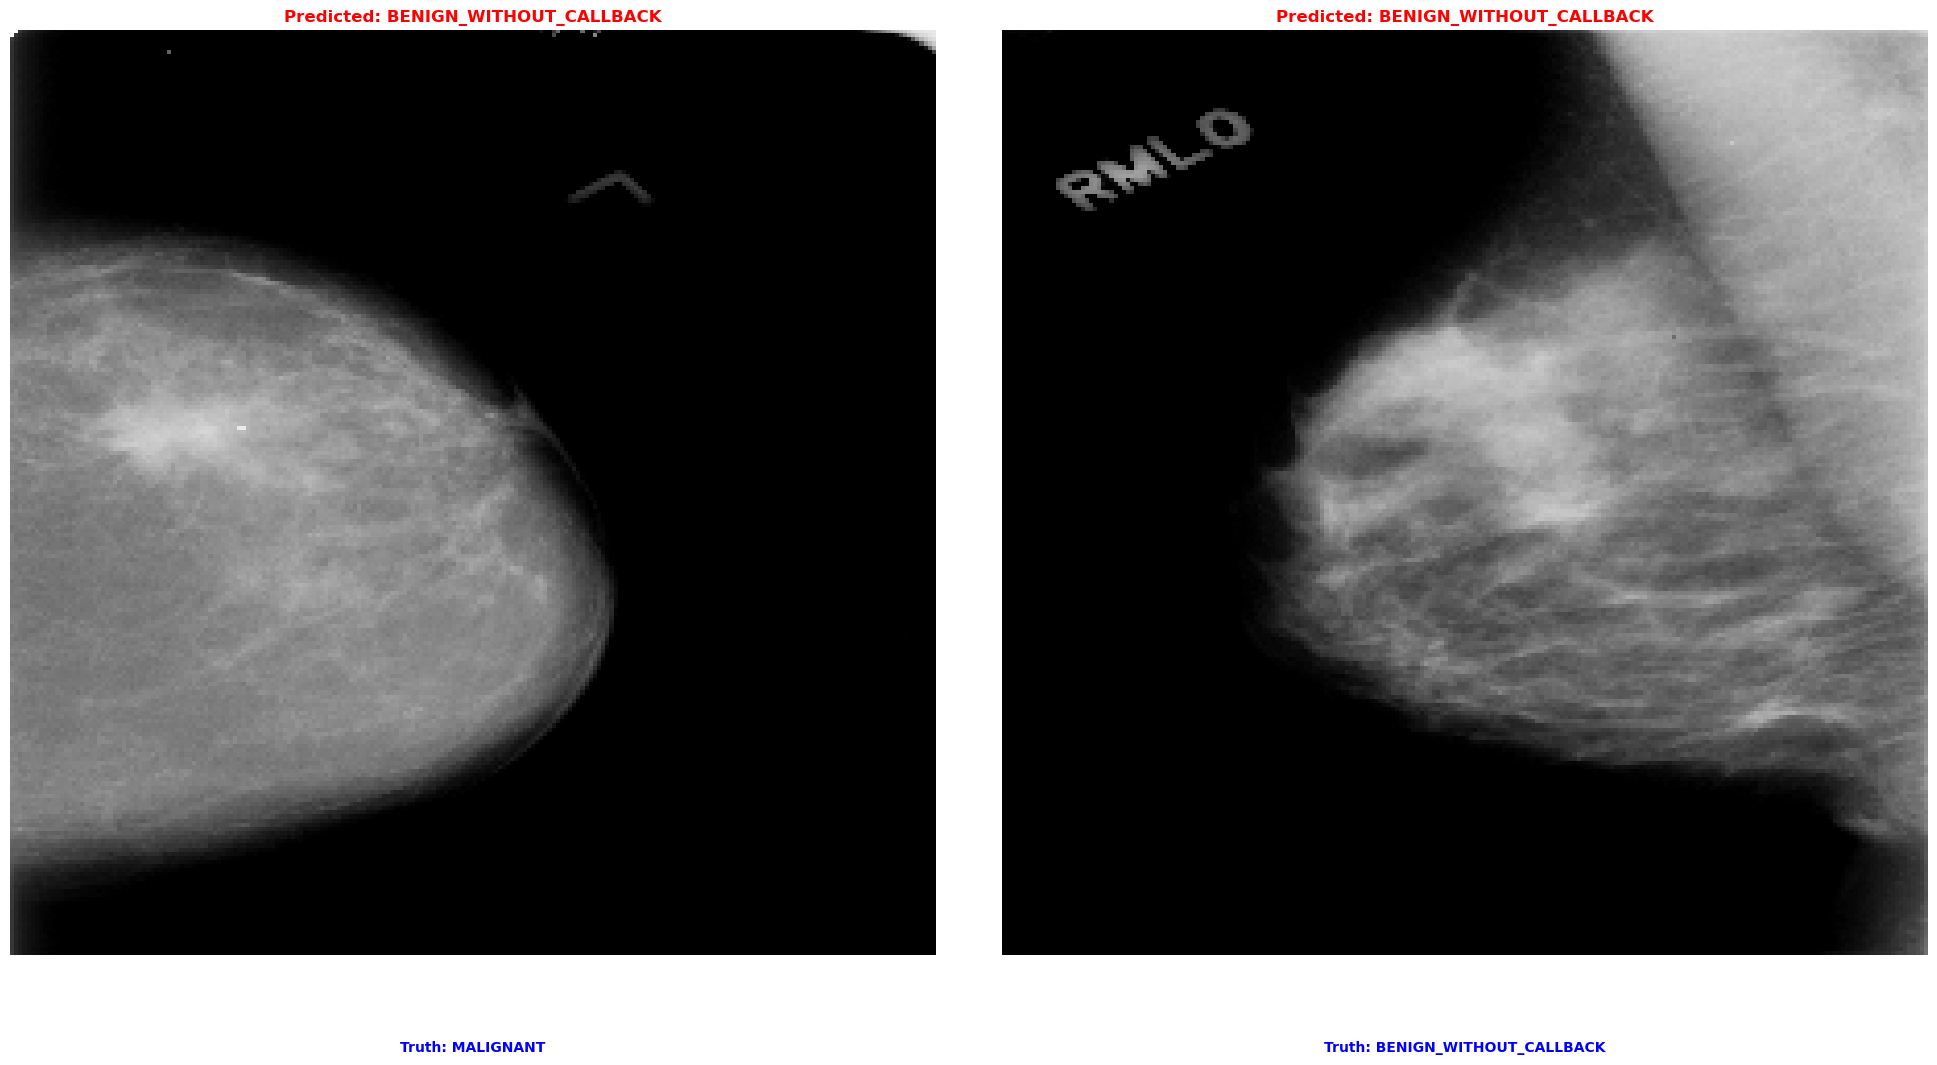

In [61]:
# display predicted class_names
num_image_visualize = min(2, len(X_test))

# create random indices to select images
random_indices = random.sample(range(len(X_test)), num_image_visualize)

# create subplots for images
fig, ax = plt.subplots(1, num_image_visualize, figsize=(20, 10))

for i, idx in enumerate(random_indices):
    ax[i].imshow(X_test[idx])
    ax[i].set_title(f'Predicted: {predicted_class_names[idx]}', color='red', fontweight="bold")
    ax[i].text(0.5, -0.1, f'Truth: {ground_truth_class_names[idx]}',fontweight="bold", ha='center', va='center', 
              transform=ax[i].transAxes, color='blue')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Hyperparameter with Optuna

In [62]:
import optuna

# Define your data and other necessary variables here
def create_model(trial):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    for i in range(trial.suggest_int('num_layers', 1, 5)):
        model.add(Conv2D(trial.suggest_int(f'filters_{i}', 32, 256), (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(trial.suggest_int('dense_units', 128, 1024), activation='relu'))
    model.add(Dropout(trial.suggest_float('dropout', 0.2, 0.5)))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(lr=trial.suggest_float('lr', 1e-5, 1e-3, log=True)), 
                  metrics=['accuracy'])

    return model

def objective(trial):
    # Generate the model
    model = create_model(trial)

    # Train the model
    history = model.fit(train_data_augmented,
                        epochs=20,  # Adjust as needed
                        validation_data=(X_val, y_val),
                        steps_per_epoch=len(X_train) // 32,
                        verbose=0)  # Adjust verbosity if needed

    # Return the validation accuracy as the objective value to minimize
    return -history.history['val_accuracy'][-1]

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=10)  # You can adjust the number of trials

# best_params = study.best_params
# print("Best params:", best_params)

### We got the hyperparameters after some trials, now we can apply them to build a new CNN model

In [63]:
# Import necessary TensorFlow libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model

# Define parameters for advanced augmentation
blur_params = (0.1, 2.0)  # Range for Gaussian Blur
perspective_enabled = True


# instantiate CNN model
model_hyperparam = Sequential()

# add layers
model_hyperparam.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_hyperparam.add(BatchNormalization())
model_hyperparam.add(MaxPooling2D((2,2)))
model_hyperparam.add(Conv2D(133, (3, 3), activation='relu'))
model_hyperparam.add(BatchNormalization())
model_hyperparam.add(MaxPooling2D((2, 2)))
model_hyperparam.add(Conv2D(68, (3,3), activation='relu'))
model_hyperparam.add(BatchNormalization())
model_hyperparam.add(MaxPooling2D((2, 2)))
model_hyperparam.add(Conv2D(40, (3, 3), activation='relu'))
model_hyperparam.add(BatchNormalization())
model_hyperparam.add(MaxPooling2D((2, 2)))
model_hyperparam.add(Conv2D(129, (3, 3), activation='relu'))
model_hyperparam.add(BatchNormalization())
model_hyperparam.add(MaxPooling2D((2, 2)))
model_hyperparam.add(Flatten()) # flatten feature maps
model_hyperparam.add(Dense(370, activation='relu')) # add fully connected layers
model_hyperparam.add(Dropout(0.3341521073978524))
model_hyperparam.add(Dense(num_classes, activation='sigmoid')) # For binary classification output layer

# compile model
model_hyperparam.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.00010641037741599881), 
              metrics=['accuracy'])

# train model
history_hyperparam = model_hyperparam.fit(train_data_augmented,
                    epochs=20,  # Increase epochs for better training
                    steps_per_epoch=len(X_train) // 32,  # Increase steps per epoch
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/20
37/37 [==============================] - 17s 373ms/step - loss: 0.7968 - accuracy: 0.4961 - val_loss: 0.6884 - val_accuracy: 0.5655
Epoch 2/20
37/37 [==============================] - 14s 367ms/step - loss: 0.8500 - accuracy: 0.5160 - val_loss: 0.6904 - val_accuracy: 0.5655
Epoch 3/20
37/37 [==============================] - 14s 374ms/step - loss: 0.7856 - accuracy: 0.4935 - val_loss: 0.7028 - val_accuracy: 0.4345
Epoch 4/20
37/37 [==============================] - 14s 364ms/step - loss: 0.8278 - accuracy: 0.4874 - val_loss: 0.7228 - val_accuracy: 0.4345
Epoch 5/20
37/37 [==============================] - 14s 364ms/step - loss: 0.8004 - accuracy: 0.5152 - val_loss: 0.7556 - val_accuracy: 0.4345
Epoch 6/20
37/37 [==============================] - 14s 371ms/step - loss: 0.8131 - accuracy: 0.5126 - val_loss: 0.7017 - val_accuracy: 0.4464


In [64]:
model_hyperparam.evaluate(X_test, y_test)

11/11 [==============================] - 1s 54ms/step - loss: 0.6892 - accuracy: 0.5601


[0.6891884207725525, 0.5601173043251038]

# Apply VGG16 as part of the Base model architecture

In [65]:
from tensorflow.keras.applications import VGG16


vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the convolutional layers of VGG16
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model
model_VGG = Sequential()

# Add VGG16 convolutional base
model_VGG.add(vgg_base)

# Flatten the output from VGG16
model_VGG.add(Flatten())

# Add additional dense layers for classification
model_VGG.add(Dense(256, activation='relu'))
model_VGG.add(BatchNormalization())
model_VGG.add(Dense(num_classes, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_VGG.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

# Display model summary
model_VGG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_10 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,139,010
Trainable params: 6,423,810
Non-trainable params: 14,715,200
__________________________________

In [66]:
# Training the model using augmented data generator and validating with separate validation data
history_VGG = model_VGG.fit(
    train_data_augmented,  # Augmented training data generator
    epochs=20,
    validation_data=(X_val, y_val), # Separate validation data and labels
    callbacks=[early_stopping]
)

Epoch 1/20
38/38 [==============================] - 22s 432ms/step - loss: 0.7503 - accuracy: 0.4777 - val_loss: 0.8030 - val_accuracy: 0.4405
Epoch 2/20
38/38 [==============================] - 14s 374ms/step - loss: 0.7294 - accuracy: 0.4844 - val_loss: 0.7443 - val_accuracy: 0.4762
Epoch 3/20
38/38 [==============================] - 14s 374ms/step - loss: 0.7068 - accuracy: 0.4810 - val_loss: 1.0460 - val_accuracy: 0.5893
Epoch 4/20
38/38 [==============================] - 14s 374ms/step - loss: 0.7235 - accuracy: 0.4878 - val_loss: 1.1992 - val_accuracy: 0.4464
Epoch 5/20
38/38 [==============================] - 14s 373ms/step - loss: 0.7041 - accuracy: 0.5223 - val_loss: 0.9207 - val_accuracy: 0.4881
Epoch 6/20
38/38 [==============================] - 14s 375ms/step - loss: 0.7004 - accuracy: 0.5265 - val_loss: 0.8586 - val_accuracy: 0.5238
Epoch 7/20
38/38 [==============================] - 14s 375ms/step - loss: 0.7013 - accuracy: 0.5299 - val_loss: 1.1345 - val_accuracy: 0.4821

In [67]:
model_VGG.evaluate(X_test, y_test)

11/11 [==============================] - 5s 451ms/step - loss: 0.7273 - accuracy: 0.5103


[0.727270781993866, 0.5102639198303223]

# Build a model based on the DenseNet-169 architecture

In [68]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [69]:
# Load DenseNet-169 base model without classification layers
base_model = DenseNet169(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation='sigmoid')(x)  # Binary classification with 'sigmoid' activation

# Combine base model and custom classification layers
model_169 = Model(inputs=base_model.input, outputs=predictions)

# Freeze some initial layers if desired
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_169.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])


history_169 = model_169.fit(train_data_augmented, 
    validation_data=(X_val, y_val), 
    epochs=20, 
    batch_size=32,
    callbacks=[early_stopping])

Epoch 1/20
38/38 [==============================] - 28s 474ms/step - loss: 0.7333 - accuracy: 0.4945 - val_loss: 0.7413 - val_accuracy: 0.4583
Epoch 2/20
38/38 [==============================] - 15s 387ms/step - loss: 0.7110 - accuracy: 0.4861 - val_loss: 0.7208 - val_accuracy: 0.5119
Epoch 3/20
38/38 [==============================] - 15s 383ms/step - loss: 0.6994 - accuracy: 0.5282 - val_loss: 0.7388 - val_accuracy: 0.5298
Epoch 4/20
38/38 [==============================] - 15s 379ms/step - loss: 0.7023 - accuracy: 0.5105 - val_loss: 0.8349 - val_accuracy: 0.5536
Epoch 5/20
38/38 [==============================] - 15s 384ms/step - loss: 0.7133 - accuracy: 0.5029 - val_loss: 0.8976 - val_accuracy: 0.5357
Epoch 6/20
38/38 [==============================] - 15s 383ms/step - loss: 0.7046 - accuracy: 0.5139 - val_loss: 1.1024 - val_accuracy: 0.5417
Epoch 7/20
38/38 [==============================] - 15s 391ms/step - loss: 0.6997 - accuracy: 0.5063 - val_loss: 2.0564 - val_accuracy: 0.5655

In [70]:
model_169.evaluate(X_test, y_test)

11/11 [==============================] - 1s 106ms/step - loss: 0.7215 - accuracy: 0.4839


[0.7215421199798584, 0.4838709533214569]

# Conditional GAN

In [71]:
from keras.models import Model
from keras.layers import Input, Reshape, Concatenate, Activation, Embedding, LeakyReLU, Input, Embedding, Conv2DTranspose, Conv2D, concatenate
from tensorflow.keras.layers import BatchNormalization, multiply, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2DTranspose, LeakyReLU


## Build Generator and Discriminator Models

In [72]:
# # Generator model
def build_generator(latent_dim, num_classes, img_shape):
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,))
    
    # Label embedding
    label_embedding = Flatten()(Embedding(num_classes, latent_dim)(label))

    # Concatenate noise and label embeddings
    model_input = concatenate([noise, label_embedding])
    
    # Project combined input to higher dimension
    model = Dense(256 * 14 * 14)(model_input)
    model = Reshape((14, 14, 256))(model)

    # Upsampling blocks
    model = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)

    model = Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)

    # Additional Upsampling layers to reach 224x224
    model = Conv2DTranspose(32, kernel_size=4, strides=2, padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    model = Conv2DTranspose(16, kernel_size=4, strides=2, padding='same')(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    
    # Upsample to reach the target resolution (224x224)
    model = Conv2DTranspose(img_shape[2], kernel_size=4, strides=1, padding='same', activation='tanh')(model)
    
    generator = Model([noise, label], model)

    return generator

In [73]:
# Discriminator model
def build_discriminator(img_shape, num_classes):
    image = Input(shape=img_shape)
    label = Input(shape=(1,))

    label_embedding = Flatten()(Embedding(num_classes, np.prod(img_shape))(label))
    label_embedding = Reshape(img_shape)(label_embedding)

    model_input = Concatenate()([image, label_embedding])

    # Try with VGG16
    # vgg = VGG16(include_top=False, weights='imagenet', input_shape=img_shape)

    # # Freeze layers in VGG
    # for layer in vgg.layers:
    #     layer.trainable = False

    # Use VGG layers as feature extractor

    # combined = Concatenate(axis=0)([image, label_embedding])
    # model = vgg(combined)

    model = Conv2D(32, kernel_size=3, strides=2, padding="same")(model_input)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dropout(0.4)(model)

    model = Conv2D(64, kernel_size=3, strides=2, padding="same")(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dropout(0.4)(model)
    
    model = Conv2D(128, kernel_size=3, strides=2, padding="same")(model)
    model = BatchNormalization()(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dropout(0.4)(model)

    model = Flatten()(model)
    model = Dense(256, activation='relu')(model)
    
    validity = Dense(1, activation='sigmoid')(model)

    discriminator = Model([image, label], validity)

    return discriminator

In [74]:
# Set parameters
latent_dim = 100
num_classes = len(full_mass['labels'].unique())
img_rows, img_cols, channels = 224, 224, 3
img_shape = (img_rows, img_cols, channels)
img_shape

(224, 224, 3)

In [75]:
# Build the discriminator
discriminator = build_discriminator(img_shape, num_classes)
# Compile the discriminator
discriminator.compile(
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 150528)    301056      ['input_4[0][0]']                
                                                                                                  
 flatten_3 (Flatten)            (None, 150528)       0           ['embedding[0][0]']              
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                          

In [76]:
# Build the generator
generator = build_generator(latent_dim, num_classes, img_shape)
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       200         ['input_6[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 100)          0           ['embedding_1[0][0]']            
                                                                                            

In [77]:
noise = Input(shape=(latent_dim,))
label = Input(shape=(1,))
generated_image = generator([noise, label])

In [78]:
generated_image.get_shape()

TensorShape([None, 224, 224, 3])

In [79]:
# For the combined model, only train the generator
discriminator.trainable = False

# The discriminator takes generated images and the target label as input and determines validity
validity = discriminator([generated_image, label])

In [80]:
validity.get_shape()

TensorShape([None, 1])

In [81]:
# Combined (generator and discriminator) model
model_combined = Model([noise, label], validity)
model_combined.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                 loss='binary_crossentropy')

In [82]:
model_combined.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 model_2 (Functional)           (None, 224, 224, 3)  10783867    ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 1)            26086689    ['model_2[0][0]',          

## Training the CGAN

In [83]:
epochs = 30000
batch_size = 32
half_batch = batch_size // 2

In [84]:
np.shape(X_train)

(1187, 224, 224, 3)

In [85]:
np.shape(y_train)

(1187, 2)

In [86]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [87]:
idx = np.random.randint(0, X_train.shape[0], half_batch)
idx

array([ 694,  470,  456,  407,  810,   11,  633,  689, 1073,   12,  453,
        236,  902,  571,  659,  610])

In [88]:
labels_for_gen = y_train[idx][:, 0].reshape((-1, 1)) 
labels_for_gen

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [89]:
np.shape(labels_for_gen)

(16, 1)

In [90]:
noise = np.random.normal(0, 1, (half_batch, latent_dim))
np.shape(noise)

(16, 100)

In [91]:
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs, labels = X_train[idx], y_train[idx]

    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    labels_for_gen = y_train[idx][:, 0].reshape((-1, 1))  # Considering the first column of y_train

    gen_imgs = generator.predict([noise, labels_for_gen])

    # Resize real images to match the discriminator's expected shape
    # resized_imgs = tf.image.resize(imgs, [224, 224], method=tf.image.ResizeMethod.BICUBIC)

    d_loss_real = discriminator.train_on_batch([imgs, labels_for_gen], np.ones((half_batch, 1)))

    # Resize generated images to match the discriminator's expected shape
    # resized_gen_imgs = tf.image.resize(gen_imgs, [224, 224], method=tf.image.ResizeMethod.BICUBIC)

    d_loss_fake = discriminator.train_on_batch([gen_imgs, labels_for_gen], np.zeros((half_batch, 1)))

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, batch_size).reshape(-1, 1)

    g_loss = model_combined.train_on_batch([noise, sampled_labels], np.ones((batch_size, 1)))

    # Print progress
    # if epoch % 100 == 0:
    #     print(f"Epoch {epoch}: [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")


1/1 [==============================] - 0s 24ms/step


In [92]:
# Generating new images
def generate_images(n_rows, n_cols, generator_model):
    noise = np.random.normal(0, 1, (n_rows * n_cols, latent_dim))
    #labels = np.tile(np.arange(0, 10).reshape(-1, 1), n_rows).reshape(-1, 1)
    labels = np.random.randint(0, num_classes, n_rows * n_cols).reshape(-1, 1)

    generated_images = generator_model.predict([noise, labels])
    generated_images = 0.5 * generated_images + 0.5  # Rescale images 0 - 1
    return generated_images

# Generate and plot images
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 269ms/step


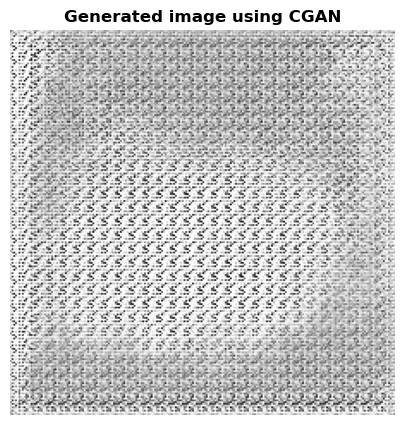

In [93]:
# Generate random 1 image
generated_image = generate_images(1, 1, generator)

generated_image = generated_image[0, :, :, 0]

plt.figure(figsize=(5, 5))  # Set the figure size (5x5 inches in this case)
plt.imshow(generated_image, cmap='gray')
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Generated image using CGAN', fontweight="bold")
plt.savefig('generated_image.png', bbox_inches='tight', pad_inches=0)  # Save the image
plt.show()

1/1 [==============================] - 0s 238ms/step


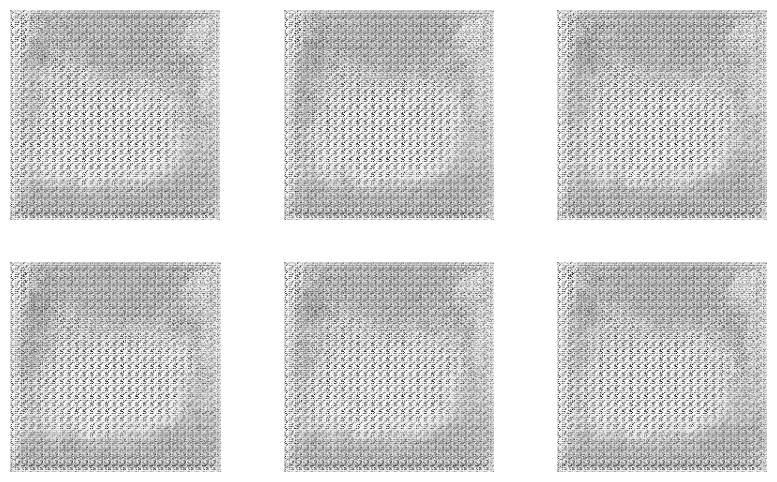

In [94]:
n_rows = 2
n_cols = 3

generated_images = generate_images(n_rows, n_cols, generator)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 6), sharex=True, sharey=False)
count = 0
for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        count += 1
plt.show()

In [95]:
# # Initialize and compile the CGAN
# cgan = CGAN(img_rows, img_cols, channels, num_classes, latent_dim)

# # Train the CGAN
# batch_size = 32
# epochs = 20000
# sample_interval = 1000

# def save_generated_images(epoch, cgan):
#     r, c = 2, 5  # Number of rows and columns for the grid of generated images
#     noise = np.random.normal(0, 1, (r * c, latent_dim))
#     sampled_labels = np.arange(0, num_classes).reshape(-1, 1)

#     # Generate images from the noise and labels
#     gen_imgs = cgan.generator.predict([noise, sampled_labels])

#     # Rescale images to 0 - 1
#     gen_imgs = 0.5 * gen_imgs + 0.5

#     fig, axs = plt.subplots(r, c)
#     cnt = 0
#     for i in range(r):
#         for j in range(c):
#             axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
#             axs[i,j].axis('off')
#             cnt += 1
#     fig.savefig(f"generated_images/{epoch}.png")
#     plt.close()

# for epoch in range(epochs):

#     # ---------------------
#     #  Train Discriminator
#     # ---------------------

#     # Select a random half batch of images
#     idx = np.random.randint(0, X_train.shape[0], batch_size)
#     imgs, labels = X_train[idx], y_train[idx]

#     # Sample noise and generate a batch of new images
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     gen_imgs = cgan.generator.predict([noise, labels])

#     # Train the discriminator (real images classified as ones and generated images as zeros)
#     d_loss_real = cgan.discriminator.train_on_batch([imgs, labels], np.ones((batch_size, 1)))
#     d_loss_fake = cgan.discriminator.train_on_batch([gen_imgs, labels], np.zeros((batch_size, 1)))
#     d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#     # ---------------------
#     #  Train Generator
#     # ---------------------

#     # Sample noise and labels to train the generator
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     sampled_labels = np.random.randint(0, num_classes, batch_size).reshape(-1, 1)

#     # Train the generator (discriminator should classify the generated images as real)
#     g_loss = cgan.combined.train_on_batch([noise, sampled_labels], np.ones((batch_size, 1)))

#     # If at sample interval, save generated image samples
#     if epoch % sample_interval == 0:
#         print(f"Epoch: {epoch} / D Loss: {d_loss[0]} / G Loss: {g_loss}")
#         save_generated_images(epoch, cgan)

# Save Model